### 1.4: Some statistics with pandas

In [1]:
# import moduled
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Load in the SF crimes dataset:

In [3]:
crime = pd.read_csv('../../assets/datasets/sf_crime.csv')

#### 2. Print the head

In [4]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
3,2011-12-03 12:10:00,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528
4,2003-01-10 00:15:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,NORTHERN,NONE,POLK ST / BROADWAY ST,-122.421772,37.795946


#### 3. Print the unique categories and how many there are

In [5]:
crime['Category'].unique()

array(['ARSON', 'LARCENY/THEFT', 'NON-CRIMINAL', 'BURGLARY',
       'SUSPICIOUS OCC', 'VEHICLE THEFT', 'ASSAULT', 'FRAUD',
       'DRUG/NARCOTIC', 'SECONDARY CODES', 'OTHER OFFENSES',
       'MISSING PERSON', 'VANDALISM', 'ROBBERY', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'WARRANTS', 'TRESPASS', 'DISORDERLY CONDUCT',
       'SEX OFFENSES FORCIBLE', 'STOLEN PROPERTY',
       'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING', 'WEAPON LAWS',
       'LOITERING', 'RECOVERED VEHICLE', 'RUNAWAY', 'DRUNKENNESS',
       'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'EMBEZZLEMENT',
       'SUICIDE', 'GAMBLING', 'BAD CHECKS', 'BRIBERY',
       'SEX OFFENSES NON FORCIBLE', 'TREA'], dtype=object)

In [6]:
crime['Category'].nunique()

38

#### 4. Print the unique districts and how many there are

In [8]:

crime['PdDistrict'].nunique()

10

In [9]:
crime['PdDistrict'].unique()


array(['BAYVIEW', 'NORTHERN', 'SOUTHERN', 'TARAVAL', 'MISSION',
       'INGLESIDE', 'CENTRAL', 'TENDERLOIN', 'RICHMOND', 'PARK'], dtype=object)

#### 5. Make a DataFrame of the crime categories and the number of crimes per category

In [44]:
df = crime['Category'].value_counts().to_frame()
df

,Category
LARCENY/THEFT,4934
OTHER OFFENSES,3656
NON-CRIMINAL,2601
ASSAULT,2164
DRUG/NARCOTIC,1533
VEHICLE THEFT,1506
VANDALISM,1280
WARRANTS,1239
BURGLARY,1023
SUSPICIOUS OCC,891


#### 6. Make a DataFrame of the districts and crime counts per district

In [49]:
df2 = crime['PdDistrict'].value_counts().to_frame()
df2

,PdDistrict
SOUTHERN,4413
MISSION,3416
NORTHERN,3076
BAYVIEW,2555
CENTRAL,2424
TENDERLOIN,2336
INGLESIDE,2256
TARAVAL,1804
PARK,1438
RICHMOND,1282


#### 7. Make a DataFrame of the day of week and crime counts per day

In [52]:
df3 = crime['DayOfWeek'].value_counts().to_frame()
df3

,DayOfWeek
Friday,3883
Wednesday,3657
Thursday,3579
Tuesday,3548
Monday,3524
Saturday,3496
Sunday,3313


#### 8. Describe one of the datasets

In [54]:
df2.describe()

,PdDistrict
count,10.000000
mean,2500.000000
std,944.070266
min,1282.000000
25%,1917.000000
50%,2380.000000
75%,2945.750000
max,4413.000000


#### 9. Calculate the mean difference between the experimental and control below

In [56]:
control = [4.8,17.3,7.0,10.8,9.4,2.6,9.0,9.6,12.7,8.5,15.8,11.0,9.7,13.1,6.3,4.4,7.8,
           9.9,7.8,7.7,12.8,13.2,6.1,7.1,6.4,11.7,11.8,6.3,14.4,9.8,14.9,11.4,9.1,10.4,
           13.2,10.0,13.5,10.1,15.0,8.8,5.3,15.1,7.6,9.9,4.9,9.2,12.3,12.1,6.9,8.3,7.0,
           6.1,13.4,11.5,6.0,12.3,5.6,14.7,3.7,7.6,10.9,10.3,10.3,10.2,7.1,6.3,13.2,9.9,
           10.6,9.8,4.9,16.9,9.1,6.7,12.2,8.2,10.1,15.5,11.9,9.7,7.9,13.4,10.6,7.9,13.1,
           11.9,11.6,2.9,13.9,14.4,8.6,7.6,8.3,12.0,5.2,7.1,13.6,6.5,9.9,14.8]

In [57]:
experimental = [15.4,14.7,14.0,25.3,15.1,14.6,0.0,20.5,16.9,18.9,20.1,16.5,13.1,16.4,
                18.3,21.3,6.3,9.0,12.1,7.4,25.6,10.8,11.4,12.1,22.7,20.1,18.3,9.4,11.0,
                14.8,12.5,12.3,16.4,13.3,14.1,15.7,12.2,15.2,16.9,1.5,18.6,4.2,12.2,8.2,
                15.3,9.3,12.0,22.8,19.7,10.7,17.8,15.4,14.5,22.2,16.7,19.3,17.1,17.4,5.4,
                10.9,13.7,17.1,11.2,15.0,18.2,14.2,11.0,19.6,10.9,13.9,17.3,11.1,19.9,
                11.2,25.1,23.7,16.5,17.9,20.1,15.8,26.4,17.7,18.9,5.6,25.6,10.4,15.5,17.7,
                22.9,18.9,21.2,5.5,13.2,13.4,21.9,11.1,13.7,16.9,16.4,18.8 ]

In [63]:
import numpy as np

mean_dif = np.mean(control) - np.mean(experimental)

print mean_dif

-5.413


#### 10. Calculate the t-statistic for the difference between means by hand (if you forgot it, look it up online or in the notes!)

The standard deviation component is the standard deviation across groups.

In [70]:
dataframe.from_records('control')

NameError: name 'dataframe' is not defined

#### 11. Plot the control and experimental distributions using seaborn on the same plot (with different colors for each)

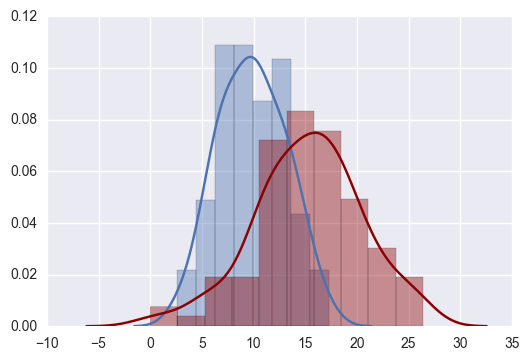

In [65]:
ax = sns.distplot(control)
sns.distplot(experimental, color='darkred', ax=ax)

#### 12. Use both Pandas and numpy to calculate the mean, median, standard deviation, min and max of the control. You'll need to convert it to a pd.Series or pd.DataFrame object.

AttributeError: 'list' object has no attribute 'to_frame'